# Работа над ошибками

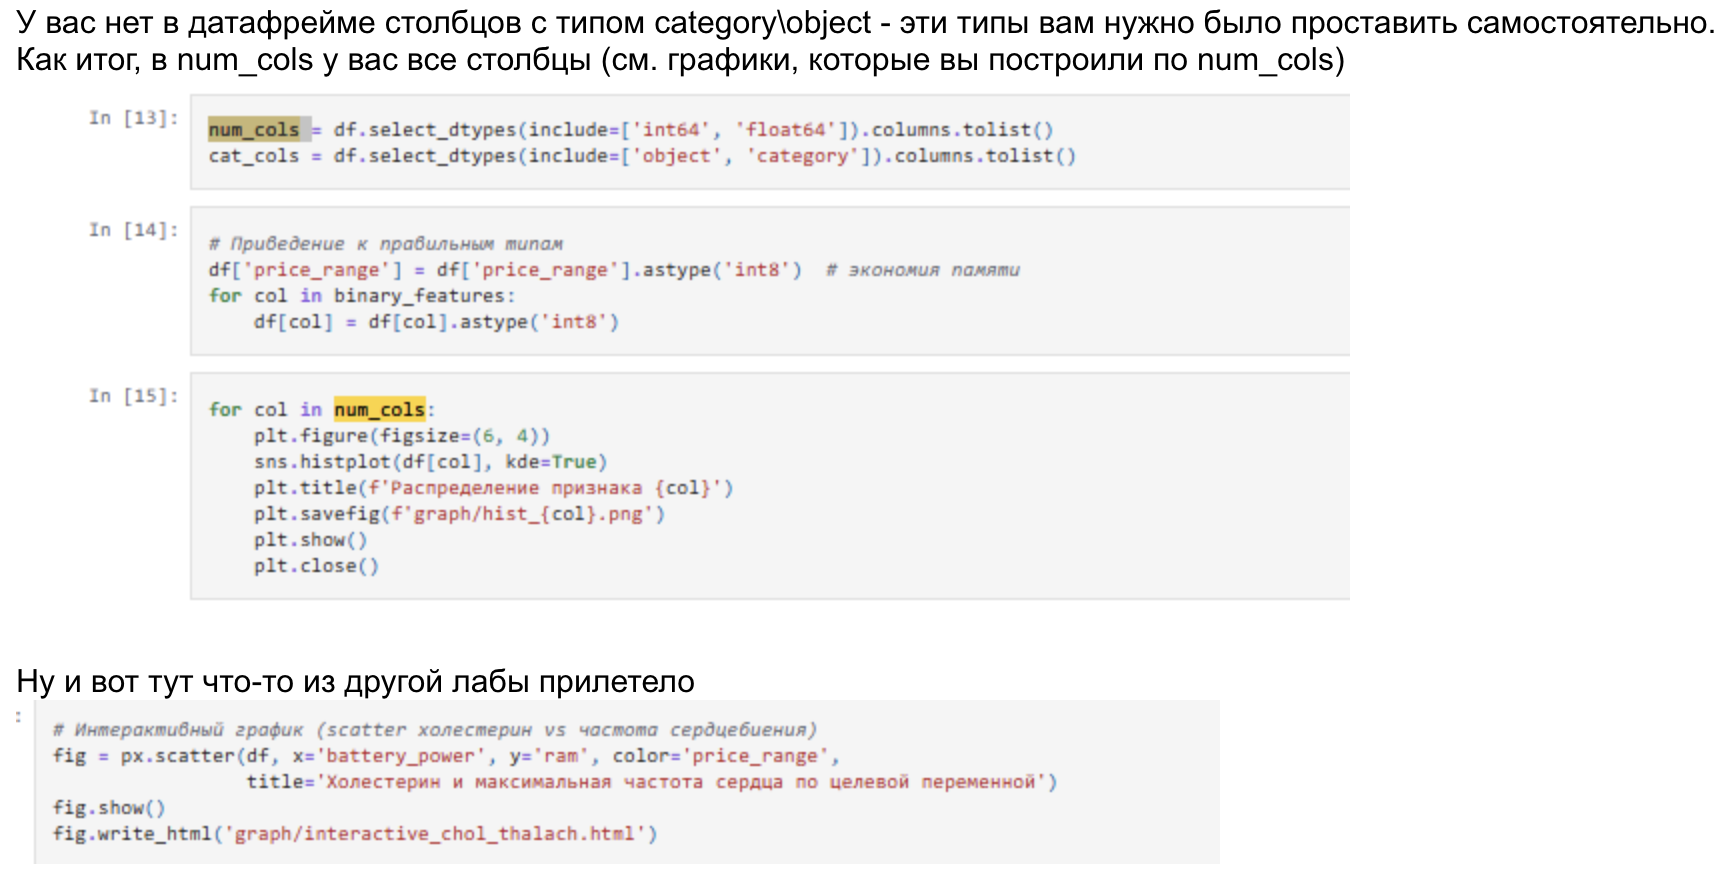

То, что прилетело из другой лабы я исправил :)

Имортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import plotly.express as px

Загружаем датасет и анализируем его

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Проверяем пропуски

In [6]:
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

print(missing_data)
print(missing_percent)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


Проверяем выборку на дубликаты и удаляем их, если есть

In [7]:
duplicates = df.duplicated().sum()

df.drop_duplicates(inplace=True)

Прогоняем очевидные проверки, по типу того, что RAM не может быть меньше нуля и тактовая частота процессора не может превышать 5ГГц (если бы это было так, то уже это был бы компьютер, а не телефон)

In [8]:
print("RAM < 0:", (df['ram'] < 0).sum())

print("Clock speed > 5GHz:", (df['clock_speed'] > 5).sum())

RAM < 0: 0
Clock speed > 5GHz: 0


Проверяем, что бинарные признаки действительно содержат только 0 и 1

In [9]:
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for col in binary_features:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")

blue: [0 1]
dual_sim: [0 1]
four_g: [0 1]
three_g: [0 1]
touch_screen: [0 1]
wifi: [1 0]


Приводим к определённым типам, чтобы сэкономить память

In [10]:
df['price_range'] = df['price_range'].astype('int8')
for col in binary_features:
    df[col] = df[col].astype('int8')

Разделяем признаки на категориальные и числовые

In [11]:
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                   'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                   'sc_h', 'sc_w', 'talk_time']

categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

target = 'price_range'

In [12]:
for clm in categorical_features:
    df[clm] = df[clm].astype('category')

Очищаем данные

In [13]:
df = df[df['battery_power'] != 0]
df = df[df['clock_speed'] != 0]
df = df[df['int_memory'] != 0]
df = df[df['m_dep'] != 0]

df = df[df['mobile_wt'] > 50]
df = df[df['px_height'] >= 50]
df = df[df['px_width'] >= 20]
df = df[df['sc_w'] < df['sc_h']]

Также добавим новые признаки: эффективность батареи относительно веса устройства и размер экрана

In [ ]:
df['battery_efficiency'] = df['battery_power'] / df['mobile_wt'] 
df['screen_size'] = np.sqrt(df['sc_h']**2 + df['sc_w']**2)

Сохранение нового очищенного датасета

In [ ]:
df.to_pickle('../data/new_clean_dataset.pkl')